Курсовой проект, Горин Никита, М4О-313Б-22

Системы интеллектуальной поддержки

##### Цель проекта — применение изученных в курсе методов и алгоритмов для анализа данных, построения моделей и оценки их качества.

В качестве датасета для работы выбран табличный датасет San Francisco Building Permits (https://www.kaggle.com/datasets/aparnashastry/building-permit-applications-data/data)

Датасет содержит 43 колонки, обозначающие все разрешения на строительства в Сан-Франциско с 1.01.2013 по 25.02.2018. Данные включают сведения о номерах заявлений/разрешений, адресах рабочих мест, надзорных округах и текущем статусе заявлений.

### Основная часть

##### Задача - предсказать на основе данных о строительстве число дней, требуемое для получения разрешения на строительство (разница между датой подачи заявки и датой получения разрешения)

Это задача регрессии для обучения с учителем. 

Целевая переменная - разница в днях между Issued Date и Filed Date - Time_in_Days

Остальные 43 колонки - признаки

##### Разведочный анализ данных (EDA). Визуализация данных. 

In [1]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor

from sklearn.model_selection import GridSearchCV,train_test_split,RandomizedSearchCV

from sklearn.impute import SimpleImputer
import warnings
warnings.filterwarnings("ignore")

## 1. Разведочный анализ данных (EDA)


In [966]:
Pmtsdata = pd.read_csv('Building_Permits.csv',
    index_col='Permit Number',
    parse_dates=['Filed Date','Issued Date', 'Current Status Date',
    'Completed Date',
    'First Construction Document Date',
    'Permit Expiration Date',
    'Permit Creation Date'])

In [967]:
Pmtsdata.head()


,Permit Type,Permit Type Definition,Permit Creation Date,Block,Lot,Street Number,Street Number Suffix,Street Name,Street Suffix,Unit,...,Existing Construction Type,Existing Construction Type Description,Proposed Construction Type,Proposed Construction Type Description,Site Permit,Supervisor District,Neighborhoods - Analysis Boundaries,Zipcode,Location,Record ID
Permit Number,,,,,,,,,,,,,,,,,,,,,
201505065519,4,sign - erect,2015-05-06,0326,023,140,NaN,Ellis,St,NaN,...,3.0,constr type 3,NaN,NaN,NaN,3.0,Tenderloin,94102.0,"(37.785719256680785, -122.40852313194863)",1380611233945
201604195146,4,sign - erect,2016-04-19,0306,007,440,NaN,Geary,St,0.0,...,3.0,constr type 3,NaN,NaN,NaN,3.0,Tenderloin,94102.0,"(37.78733980600732, -122.41063199757738)",1420164406718
201605278609,3,additions alterations or repairs,2016-05-27,0595,203,1647,NaN,Pacific,Av,NaN,...,1.0,constr type 1,1.0,constr type 1,NaN,3.0,Russian Hill,94109.0,"(37.7946573324287, -122.42232562979227)",1424856504716
201611072166,8,otc alterations permit,2016-11-07,0156,011,1230,NaN,Pacific,Av,0.0,...,5.0,wood frame (5),5.0,wood frame (5),NaN,3.0,Nob Hill,94109.0,"(37.79595867909168, -122.41557405519474)",1443574295566
201611283529,6,demolitions,2016-11-28,0342,001,950,NaN,Market,St,NaN,...,3.0,constr type 3,NaN,NaN,NaN,6.0,Tenderloin,94102.0,"(37.78315261897309, -122.40950883997789)",144548169992


In [968]:
Pmtsdata.info()

<class 'pandas.core.frame.DataFrame'>
Index: 198900 entries, 201505065519 to M864287
Data columns (total 42 columns):
 #   Column                                  Non-Null Count   Dtype         
---  ------                                  --------------   -----         
 0   Permit Type                             198900 non-null  int64         
 1   Permit Type Definition                  198900 non-null  object        
 2   Permit Creation Date                    198900 non-null  datetime64[ns]
 3   Block                                   198900 non-null  object        
 4   Lot                                     198900 non-null  object        
 5   Street Number                           198900 non-null  int64         
 6   Street Number Suffix                    2216 non-null    object        
 7   Street Name                             198900 non-null  object        
 8   Street Suffix                           196132 non-null  object        
 9   Unit                          

Создадим столбец-таргет (Time_in_Days)

In [ ]:

Pmtsdata = Pmtsdata.dropna(subset=['Issued Date', 'Filed Date'])


Pmtsdata['Issued Date'] = pd.to_datetime(Pmtsdata['Issued Date'])
Pmtsdata['Filed Date'] = pd.to_datetime(Pmtsdata['Filed Date'])


Pmtsdata['Time_in_Days'] = (Pmtsdata['Issued Date'] - Pmtsdata['Filed Date']).dt.days

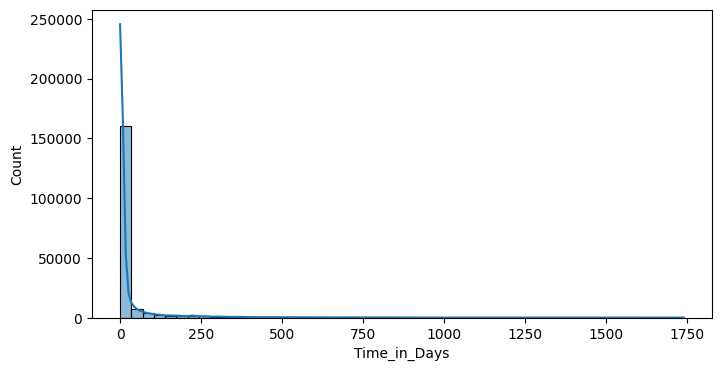

In [970]:
plt.figure(figsize=(8,4))
sns.histplot(Pmtsdata['Time_in_Days'], bins=50, kde=True)
plt.show()


Для более наглядного отображения рассмотрим только Time_in_Days меньше 250

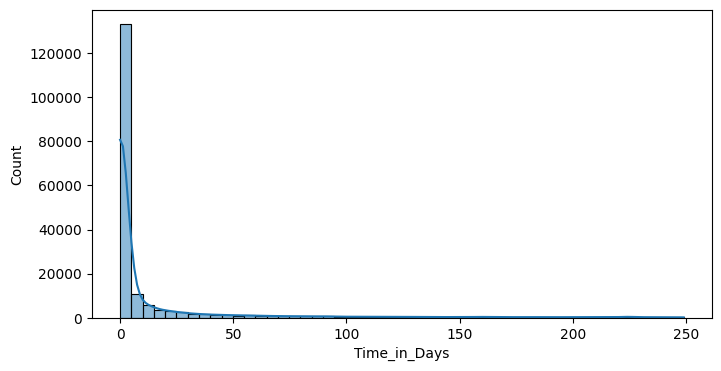

In [971]:

filtered_data = Pmtsdata[Pmtsdata['Time_in_Days'] < 250]

plt.figure(figsize=(8,4))
sns.histplot(filtered_data['Time_in_Days'], bins=50, kde=True)
plt.show()

Заметим, что в пределах первых 50 дней сосредоточены почти все существующие данные. Визуализируем часть данных, где Time_in_Days > 50

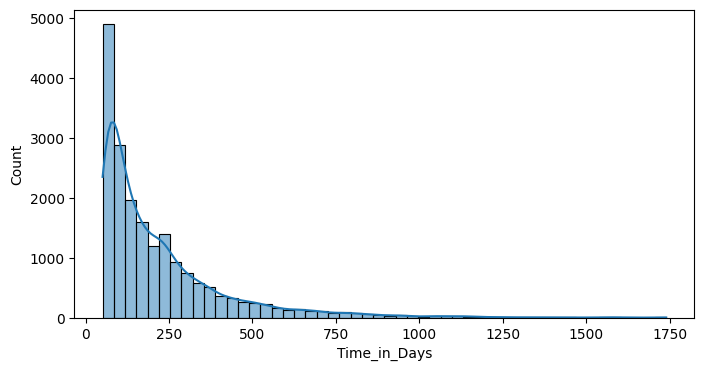

In [972]:
filtered_data = Pmtsdata[Pmtsdata['Time_in_Days'] > 50]

plt.figure(figsize=(8,4))
sns.histplot(filtered_data['Time_in_Days'], bins=50, kde=True)
plt.show()

Прежде чем визуализировать признаки, обработаем пропуски

In [973]:
missing_values_counts = Pmtsdata.isnull().sum()
print(missing_values_counts)

Permit Type                                    0
Permit Type Definition                         0
Permit Creation Date                           0
Block                                          0
Lot                                            0
Street Number                                  0
Street Number Suffix                      181969
Street Name                                    0
Street Suffix                               2592
Unit                                      156662
Unit Suffix                               182106
Description                                   86
Current Status                                 0
Current Status Date                            0
Filed Date                                     0
Issued Date                                    0
Completed Date                             86788
First Construction Document Date              32
Structural Notification                   178750
Number of Existing Stories                 40757
Number of Proposed S

Пропусков очень много. Рассмотрим распределение их по процентам 

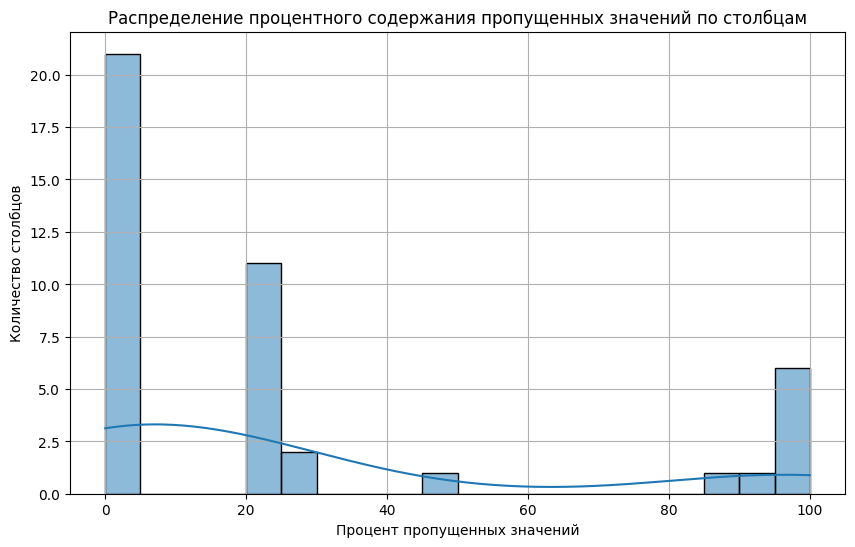

In [974]:
total_rows = len(Pmtsdata)

missing_percentages = (missing_values_counts / total_rows) * 100
missing_percentages_df = pd.DataFrame({'Column': missing_percentages.index, 'MissingPercentage': missing_percentages.values})
plt.figure(figsize=(10, 6))
sns.histplot(data=missing_percentages_df, x='MissingPercentage', bins=20, kde=True)
plt.title('Распределение процентного содержания пропущенных значений по столбцам')
plt.xlabel('Процент пропущенных значений')
plt.ylabel('Количество столбцов')
plt.grid(True)
plt.show()

In [ ]:

total_rows = len(Pmtsdata)

missing_percentages = (missing_values_counts / total_rows) * 100

high_missing_columns = missing_percentages[missing_percentages > 80].index.tolist()

print(high_missing_columns)

Pmtsdata = Pmtsdata.drop(columns=high_missing_columns)
Pmtsdata.shape

['Street Number Suffix', 'Unit', 'Unit Suffix', 'Structural Notification', 'Voluntary Soft-Story Retrofit', 'Fire Only Permit', 'TIDF Compliance', 'Site Permit']


(183960, 35)

In [976]:

missing_percentages = Pmtsdata.isnull().mean() * 100
missing_percentages_df = missing_percentages[missing_percentages > 0].sort_values(ascending=False)
missing_percentages_df

Completed Date                            47.177647
Existing Units                            26.464992
Proposed Units                            26.199717
Existing Construction Type Description    22.446184
Existing Construction Type                22.446184
Proposed Construction Type Description    22.333116
Proposed Construction Type                22.333116
Number of Proposed Stories                22.190694
Number of Existing Stories                22.155360
Proposed Use                              21.968906
Existing Use                              21.301913
Estimated Cost                            20.148402
Permit Expiration Date                    20.091324
Plansets                                  20.075560
Street Suffix                              1.409002
Neighborhoods - Analysis Boundaries        0.904544
Supervisor District                        0.900739
Zipcode                                    0.900196
Location                                   0.892042
Description 

In [977]:
Pmtsdata.head()

,Permit Type,Permit Type Definition,Permit Creation Date,Block,Lot,Street Number,Street Name,Street Suffix,Description,Current Status,...,Existing Construction Type,Existing Construction Type Description,Proposed Construction Type,Proposed Construction Type Description,Supervisor District,Neighborhoods - Analysis Boundaries,Zipcode,Location,Record ID,Time_in_Days
Permit Number,,,,,,,,,,,,,,,,,,,,,
201505065519,4,sign - erect,2015-05-06,0326,023,140,Ellis,St,"ground fl facade: to erect illuminated, electr...",expired,...,3.0,constr type 3,NaN,NaN,3.0,Tenderloin,94102.0,"(37.785719256680785, -122.40852313194863)",1380611233945,187
201604195146,4,sign - erect,2016-04-19,0306,007,440,Geary,St,remove (e) awning and associated signs.,issued,...,3.0,constr type 3,NaN,NaN,3.0,Tenderloin,94102.0,"(37.78733980600732, -122.41063199757738)",1420164406718,471
201611072166,8,otc alterations permit,2016-11-07,0156,011,1230,Pacific,Av,repair dryrot & stucco at front of bldg.,complete,...,5.0,wood frame (5),5.0,wood frame (5),3.0,Nob Hill,94109.0,"(37.79595867909168, -122.41557405519474)",1443574295566,253
201611283529,6,demolitions,2016-11-28,0342,001,950,Market,St,demolish retail/office/commercial 3-story buil...,issued,...,3.0,constr type 3,NaN,NaN,6.0,Tenderloin,94102.0,"(37.78315261897309, -122.40950883997789)",144548169992,368
201706149344,8,otc alterations permit,2017-06-14,4105,009,800,Indiana,St,evac maps,issued,...,1.0,constr type 1,1.0,constr type 1,10.0,Potrero Hill,94107.0,"(37.75922331346539, -122.39170402628598)",1466911170855,22


In [ ]:
unique_record_ids = Pmtsdata['Record ID'].nunique()

print(unique_record_ids)
print(Pmtsdata.shape)

183960
(183960, 35)


Параметр Description слишком сложен для интерпретации (в рамках этого проекта)
Параметры Existing Construction Type Description и Proposed Construction Type Description являются категориальными со слишком большим количеством уникальных значений (более 40 тысяч),
сложно для интерпретации в рамках проекта + имеются частично дублирующие эту информацию признаки Existing Construction Type и Proposed Construction Type

Параметр Filed Date избыточен (вследствие появления таргета)

Параметр Record ID не участвует (уникальный идентификатор)

Параметр Location не нужен (имеется Supervisor District)

In [979]:
Pmtsdata = Pmtsdata.drop(columns=['Description', 'Filed Date', 'Record ID', 'Location', 'Proposed Construction Type Description', 'Existing Construction Type Description'])
Pmtsdata.head()

,Permit Type,Permit Type Definition,Permit Creation Date,Block,Lot,Street Number,Street Name,Street Suffix,Current Status,Current Status Date,...,Existing Units,Proposed Use,Proposed Units,Plansets,Existing Construction Type,Proposed Construction Type,Supervisor District,Neighborhoods - Analysis Boundaries,Zipcode,Time_in_Days
Permit Number,,,,,,,,,,,,,,,,,,,,,
201505065519,4,sign - erect,2015-05-06,0326,023,140,Ellis,St,expired,2017-12-21,...,143.0,NaN,NaN,2.0,3.0,NaN,3.0,Tenderloin,94102.0,187
201604195146,4,sign - erect,2016-04-19,0306,007,440,Geary,St,issued,2017-08-03,...,NaN,NaN,NaN,2.0,3.0,NaN,3.0,Tenderloin,94102.0,471
201611072166,8,otc alterations permit,2016-11-07,0156,011,1230,Pacific,Av,complete,2017-07-24,...,1.0,1 family dwelling,1.0,2.0,5.0,5.0,3.0,Nob Hill,94109.0,253
201611283529,6,demolitions,2016-11-28,0342,001,950,Market,St,issued,2017-12-01,...,NaN,NaN,NaN,2.0,3.0,NaN,6.0,Tenderloin,94102.0,368
201706149344,8,otc alterations permit,2017-06-14,4105,009,800,Indiana,St,issued,2017-07-06,...,326.0,apartments,326.0,2.0,1.0,1.0,10.0,Potrero Hill,94107.0,22


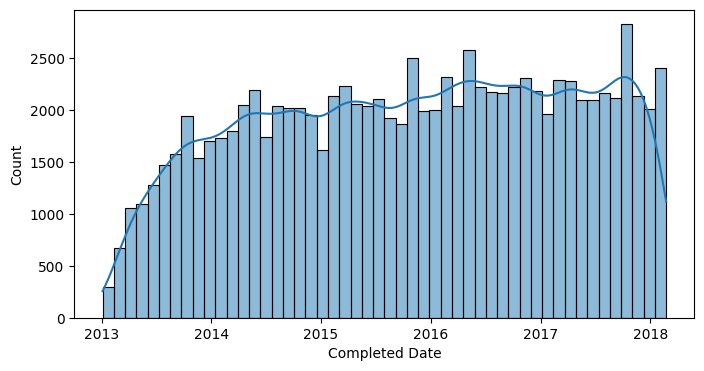

In [980]:
plt.figure(figsize=(8,4))
sns.histplot(Pmtsdata['Completed Date'], bins=50, kde=True)
plt.show()

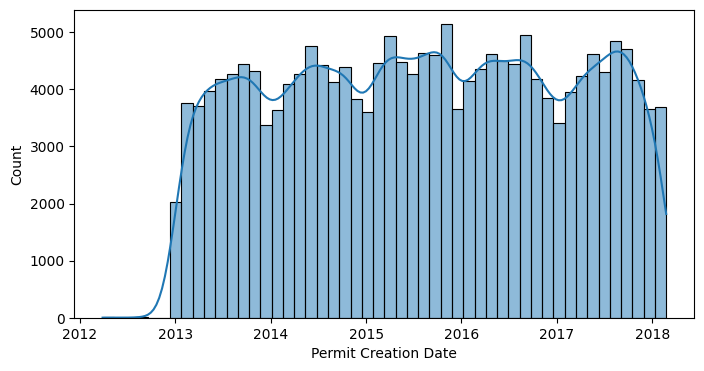

In [981]:
plt.figure(figsize=(8,4))
sns.histplot(Pmtsdata['Permit Creation Date'], bins=50, kde=True)
plt.show()

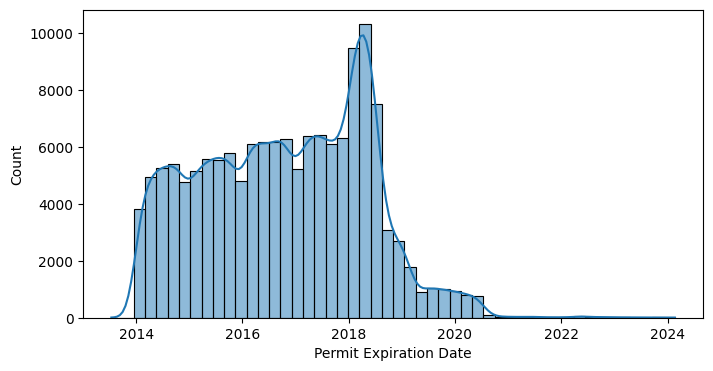

In [982]:
plt.figure(figsize=(8,4))
sns.histplot(Pmtsdata['Permit Expiration Date'], bins=50, kde=True)
plt.show()

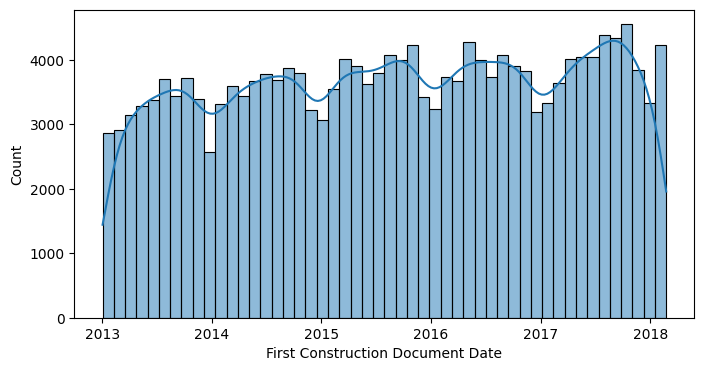

In [983]:
plt.figure(figsize=(8,4))
sns.histplot(Pmtsdata['First Construction Document Date'], bins=50, kde=True)
plt.show()

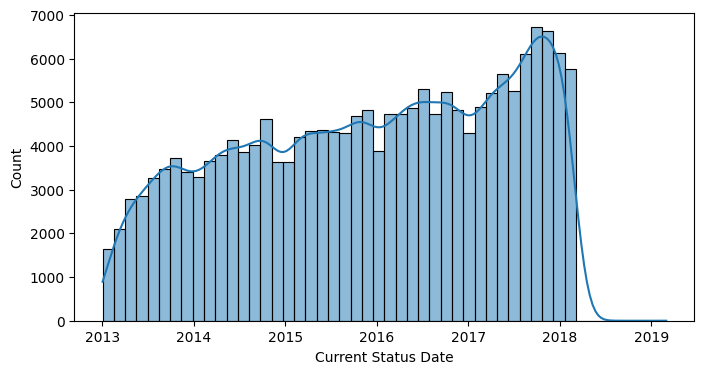

In [984]:
plt.figure(figsize=(8,4))
sns.histplot(Pmtsdata['Current Status Date'], bins=50, kde=True)
plt.show()

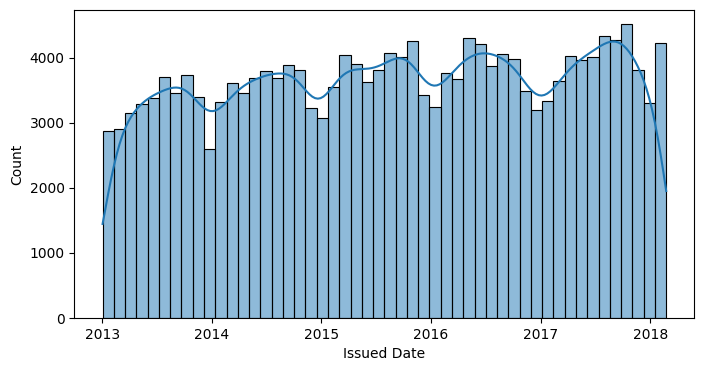

In [985]:
plt.figure(figsize=(8,4))
sns.histplot(Pmtsdata['Issued Date'], bins=50, kde=True)
plt.show()

In [986]:
date_columns = ['Issued Date', 'Permit Creation Date', 'Current Status Date', 'Permit Expiration Date', 'Completed Date', 'First Construction Document Date']

base_date = pd.Timestamp('2010-01-01')

for column in date_columns:
    mx = base_date
    if(column == 'Completed Date'):
        mx = Pmtsdata[column].median()
    if(column == 'Permit Creation Date'):
        mx = Pmtsdata[column].max()
    elif(column == 'Permit Expiration Date'):
        mx = Pmtsdata[column].median()
    elif(column == 'First Construction Document Date'):  
        mx = Pmtsdata[column].median() 
    Pmtsdata[column] = Pmtsdata[column].fillna(mx)

    Pmtsdata[column] = pd.to_datetime(Pmtsdata[column], errors='coerce')

    Pmtsdata[column] = (Pmtsdata[column] - base_date).dt.days

Pmtsdata[date_columns].head()

,Issued Date,Permit Creation Date,Current Status Date,Permit Expiration Date,Completed Date,First Construction Document Date
Permit Number,,,,,,
201505065519,2138,1951,2911,2498,2149,2138
201604195146,2771,2300,2771,2893,2149,2771
201611072166,2755,2502,2761,3115,2761,2755
201611283529,2891,2523,2891,3256,2149,2880
201706149344,2743,2721,2743,3103,2149,2743


In [987]:
missing_percentages = Pmtsdata.isnull().mean() * 100
missing_percentages_df = missing_percentages[missing_percentages > 0].sort_values(ascending=False)
missing_percentages_df

Existing Units                         26.464992
Proposed Units                         26.199717
Existing Construction Type             22.446184
Proposed Construction Type             22.333116
Number of Proposed Stories             22.190694
Number of Existing Stories             22.155360
Proposed Use                           21.968906
Existing Use                           21.301913
Estimated Cost                         20.148402
Plansets                               20.075560
Street Suffix                           1.409002
Neighborhoods - Analysis Boundaries     0.904544
Supervisor District                     0.900739
Zipcode                                 0.900196
Revised Cost                            0.004892
dtype: float64

In [988]:
Pmtsdata.info()

<class 'pandas.core.frame.DataFrame'>
Index: 183960 entries, 201505065519 to M864287
Data columns (total 29 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   Permit Type                          183960 non-null  int64  
 1   Permit Type Definition               183960 non-null  object 
 2   Permit Creation Date                 183960 non-null  int64  
 3   Block                                183960 non-null  object 
 4   Lot                                  183960 non-null  object 
 5   Street Number                        183960 non-null  int64  
 6   Street Name                          183960 non-null  object 
 7   Street Suffix                        181368 non-null  object 
 8   Current Status                       183960 non-null  object 
 9   Current Status Date                  183960 non-null  int64  
 10  Issued Date                          183960 non-null  int64  
 11  Comple

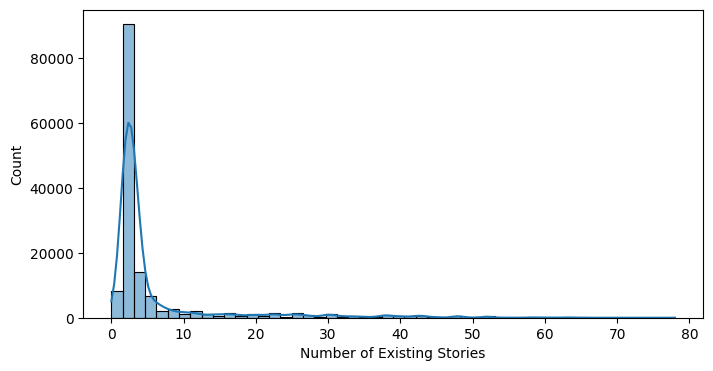

In [989]:
plt.figure(figsize=(8,4))
sns.histplot(Pmtsdata['Number of Existing Stories'], bins=50, kde=True)
plt.show()

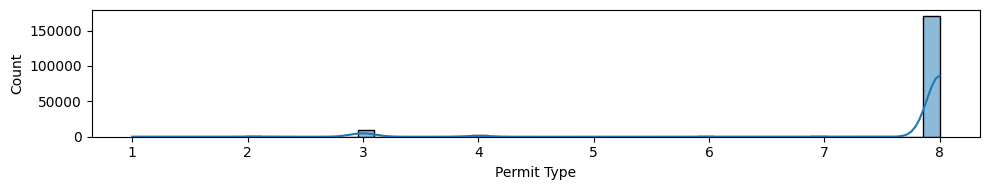

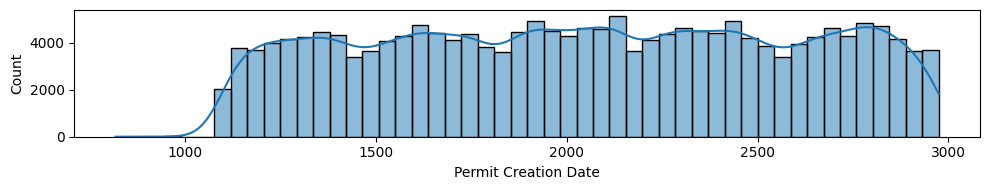

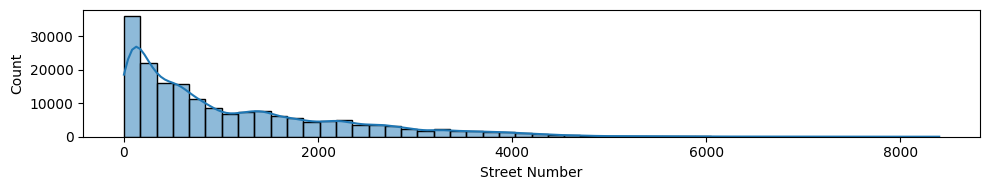

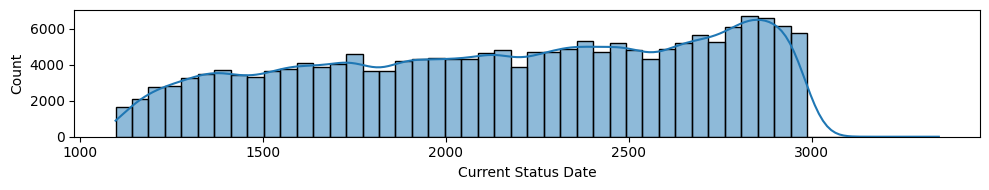

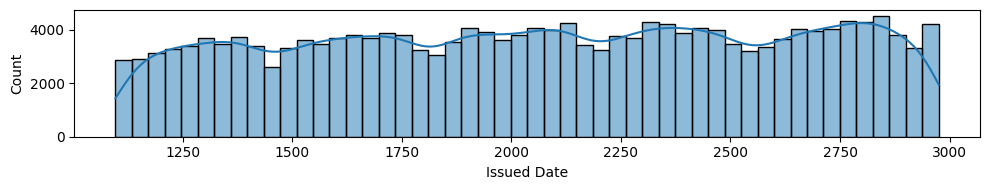

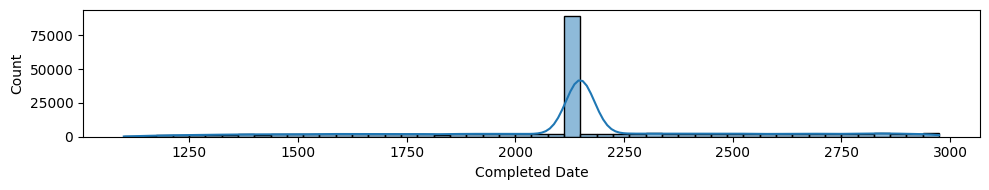

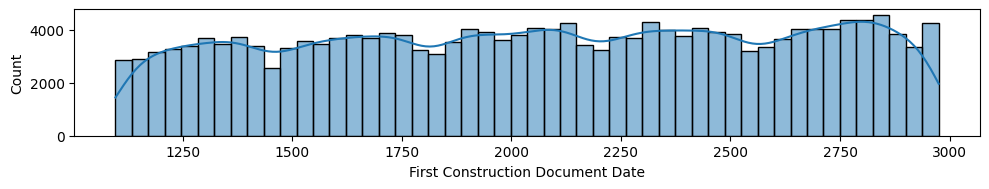

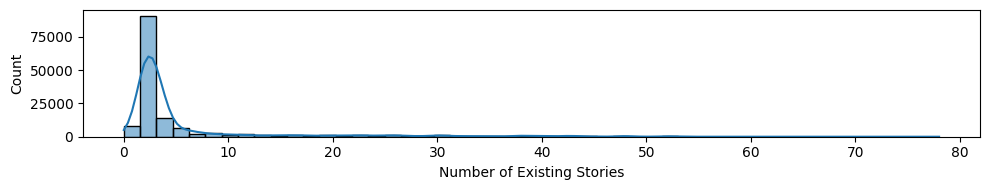

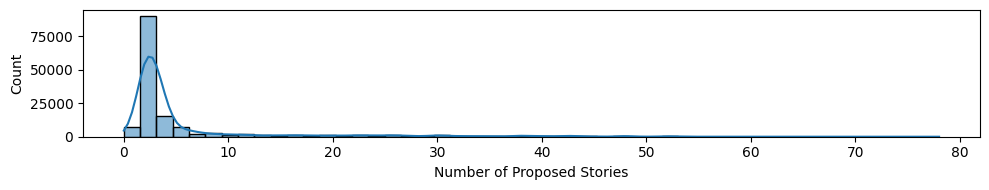

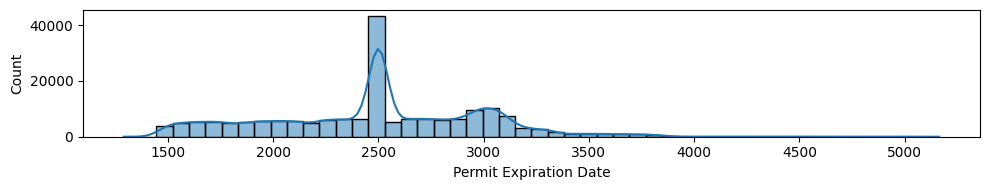

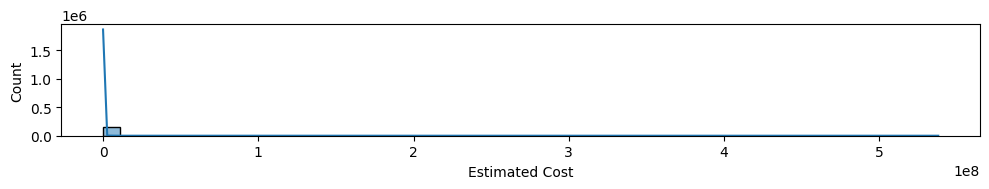

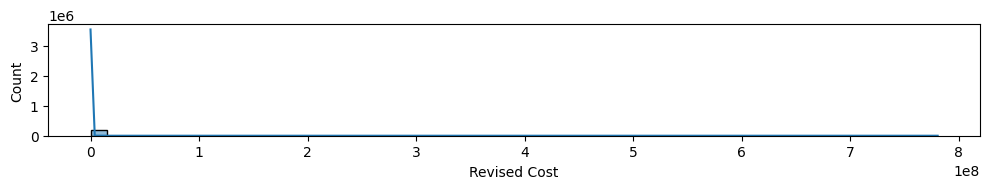

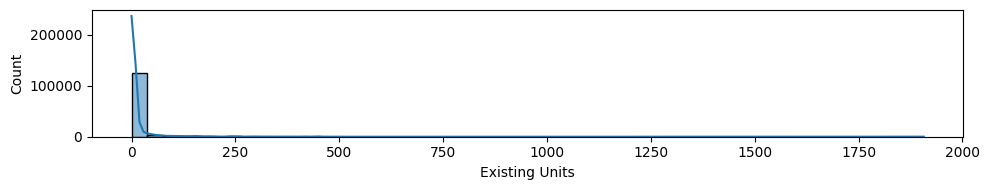

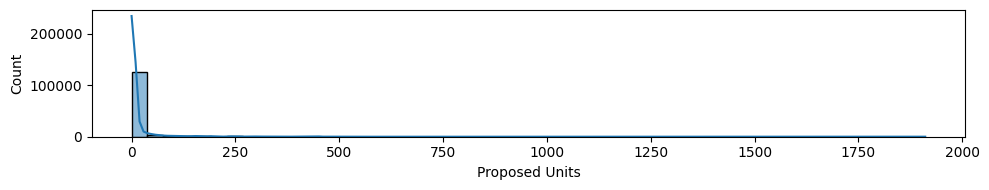

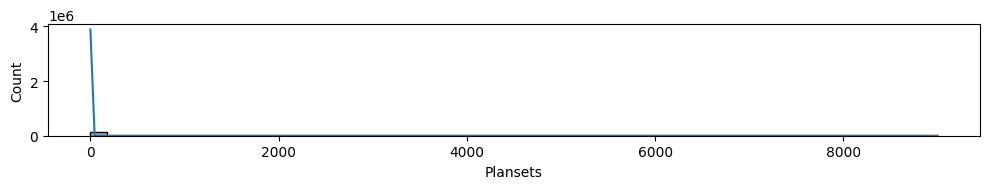

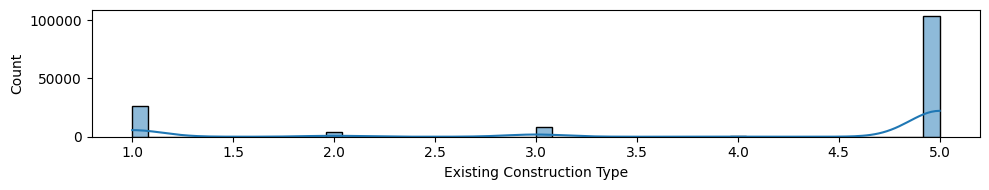

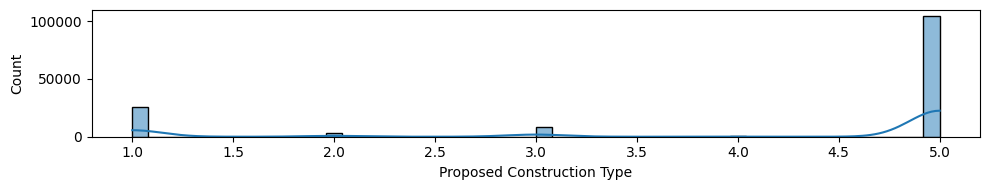

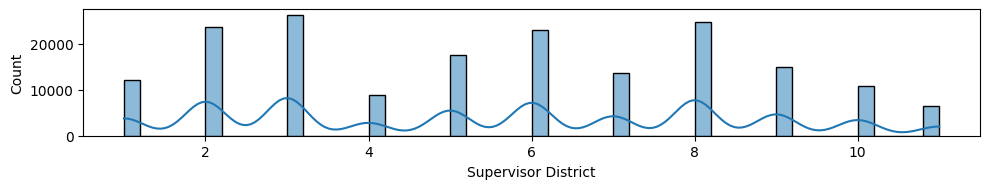

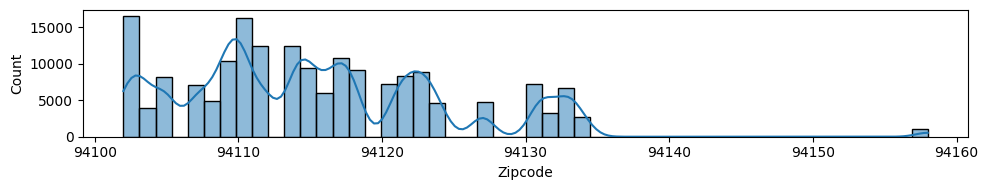

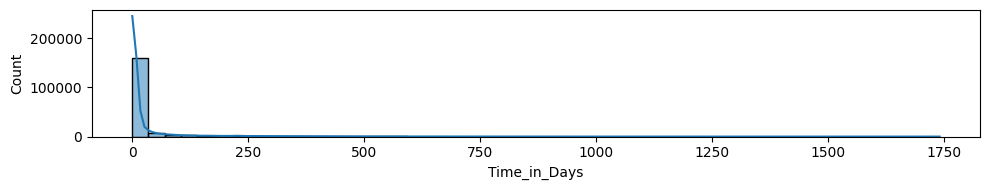

In [990]:
num_cols = Pmtsdata.select_dtypes(include=['float64', 'int64']).columns.tolist()

for col in num_cols:
    plt.figure(figsize=(10, 2))
    sns.histplot(Pmtsdata[col], bins=50, kde=True)
    plt.tight_layout()
    plt.show()


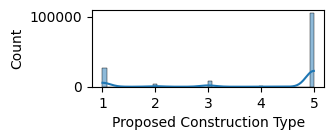

In [991]:
plt.figure(figsize=(3,1))
sns.histplot(Pmtsdata['Proposed Construction Type'], bins=50, kde=True)
plt.show()

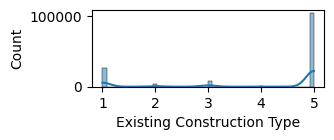

In [992]:
plt.figure(figsize=(3,1))
sns.histplot(Pmtsdata['Existing Construction Type'], bins=50, kde=True)
plt.show()

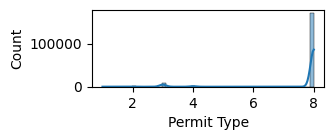

In [993]:
plt.figure(figsize=(3,1))
sns.histplot(Pmtsdata['Permit Type'], bins=50, kde=True)
plt.show()

Первые три всегда принимают одно значение, а отличные от 0 значения в Unit почти не принимаются. Уберем эти признаки

In [ ]:
num_cols = ['Estimated Cost', 'Revised Cost']
for col in num_cols:
    Q1 = Pmtsdata[col].quantile(0.25)
    Q3 = Pmtsdata[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 2 * IQR
    upper = Q3 + 2 * IQR
    before = len(Pmtsdata)
    Pmtsdata = Pmtsdata[(Pmtsdata[col] >= lower) & (Pmtsdata[col] <= upper)]
    after = len(Pmtsdata)
    print(f'{col}: удалено {before - after} выбросов')

Pmtsdata[num_cols].describe()

Estimated Cost: удалено 54043 выбросов
Revised Cost: удалено 7823 выбросов


,Estimated Cost,Revised Cost
count,122094.000000,122094.000000
mean,12736.163611,14550.088274
std,14217.077190,15828.595710
min,1.000000,0.000000
25%,2200.000000,2690.500000
50%,8000.000000,9000.000000
75%,18000.000000,20000.000000
max,83200.000000,69000.000000


In [995]:
missing_values_counts = Pmtsdata.isnull().sum()
print(missing_values_counts.sort_values(ascending=False))
Pmtsdata.shape

Proposed Units                         8727
Existing Units                         8325
Proposed Construction Type             3748
Number of Proposed Stories             3543
Proposed Use                           3278
Existing Construction Type             2980
Number of Existing Stories             2525
Street Suffix                          1580
Existing Use                           1248
Neighborhoods - Analysis Boundaries     881
Supervisor District                     876
Zipcode                                 875
Permit Type Definition                    0
First Construction Document Date          0
Completed Date                            0
Issued Date                               0
Current Status Date                       0
Current Status                            0
Street Name                               0
Street Number                             0
Lot                                       0
Permit Type                               0
Block                           

(122094, 29)

In [996]:
Pmtsdata_cleaned = Pmtsdata.dropna()
print(Pmtsdata_cleaned.shape)
Pmtsdata_cleaned.shape[0] / Pmtsdata.shape[0] 

(108949, 29)


0.8923370517797763

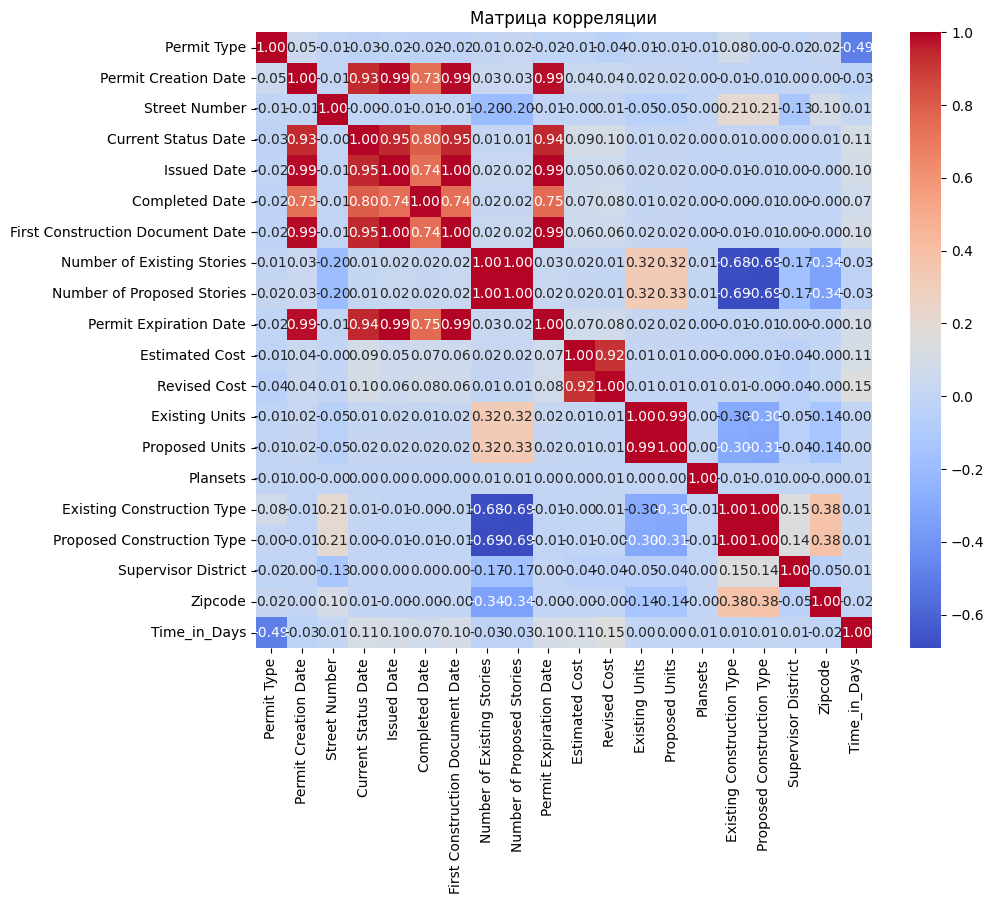

In [ ]:
correlation_matrix = Pmtsdata.select_dtypes(include=['float64', 'int64']).corr()

plt.figure(figsize=(10, 8))

sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True)

plt.title('Матрица корреляции')

plt.show()

Number of Existing Stories Коррелирует с Number of Proposed Stories. Удалим первый
Existing Construction Type коррелирует с Proposed Construction Type. Удалим первый
Estimated Cost сильно коррелирует с Revised Cost. Удалим первый
Existing Units сильно коррелирует с Proposed Units. Удалим первый

Issued Date достаточно, уберем Permit Creation Date, Permit Expiration Date, Current Status Date, First Construction Document Date


In [998]:
Pmtsdata = Pmtsdata.drop(columns=['Number of Existing Stories', 'Existing Construction Type',
'Permit Creation Date', 'Current Status Date', 'First Construction Document Date',
'Permit Expiration Date', 'Estimated Cost', 'Existing Units'])

In [999]:
Pmtsdata.shape

(122094, 21)

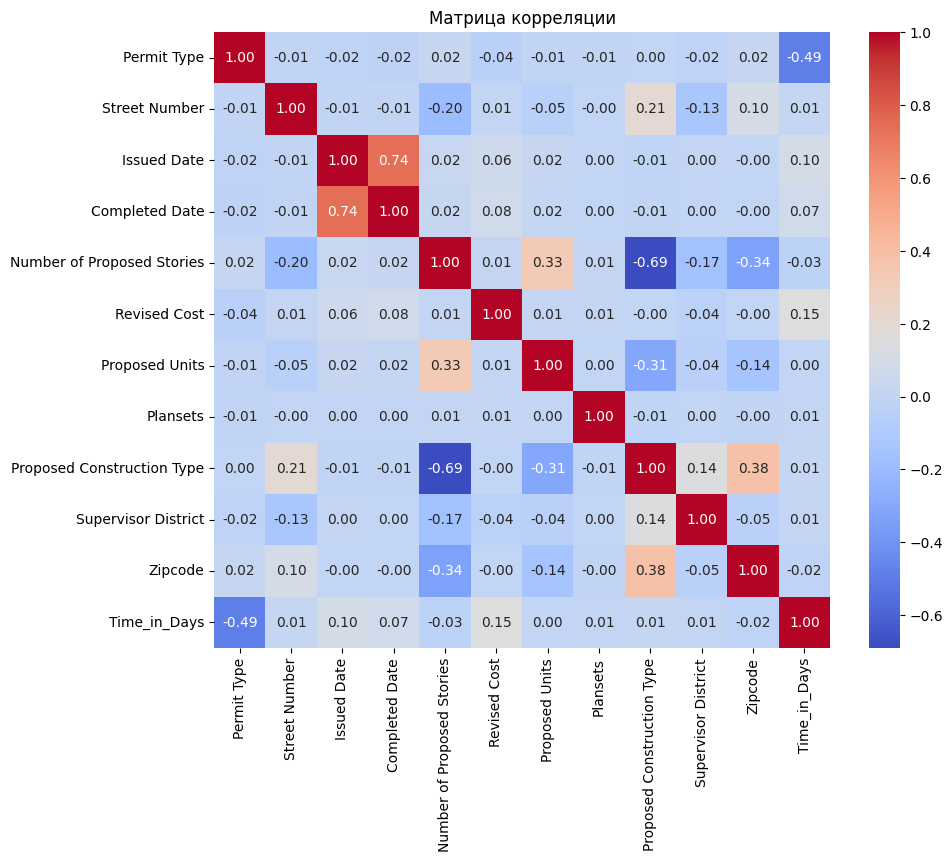

In [ ]:
correlation_matrix = Pmtsdata.select_dtypes(include=['float64', 'int64']).corr()

plt.figure(figsize=(10, 8))


sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True)


plt.title('Матрица корреляции')


plt.show()

In [1001]:
Pmtsdata.info()

<class 'pandas.core.frame.DataFrame'>
Index: 122094 entries, 201505065519 to 201712055595
Data columns (total 21 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   Permit Type                          122094 non-null  int64  
 1   Permit Type Definition               122094 non-null  object 
 2   Block                                122094 non-null  object 
 3   Lot                                  122094 non-null  object 
 4   Street Number                        122094 non-null  int64  
 5   Street Name                          122094 non-null  object 
 6   Street Suffix                        120514 non-null  object 
 7   Current Status                       122094 non-null  object 
 8   Issued Date                          122094 non-null  int64  
 9   Completed Date                       122094 non-null  int64  
 10  Number of Proposed Stories           118551 non-null  float64
 11  R

Столбец 'Permit Type Definition' содержит 8 уникальных значений


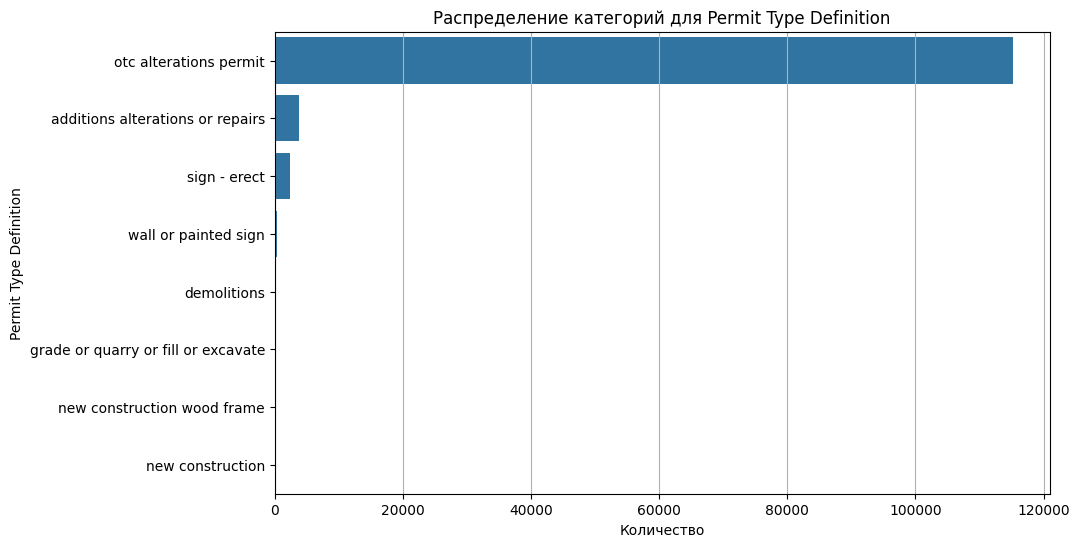

Столбец 'Block' содержит 4792 уникальных значений
Столбец 'Lot' содержит 989 уникальных значений
Столбец 'Street Name' содержит 1642 уникальных значений
Столбец 'Street Suffix' содержит 21 уникальных значений
Столбец 'Current Status' содержит 10 уникальных значений


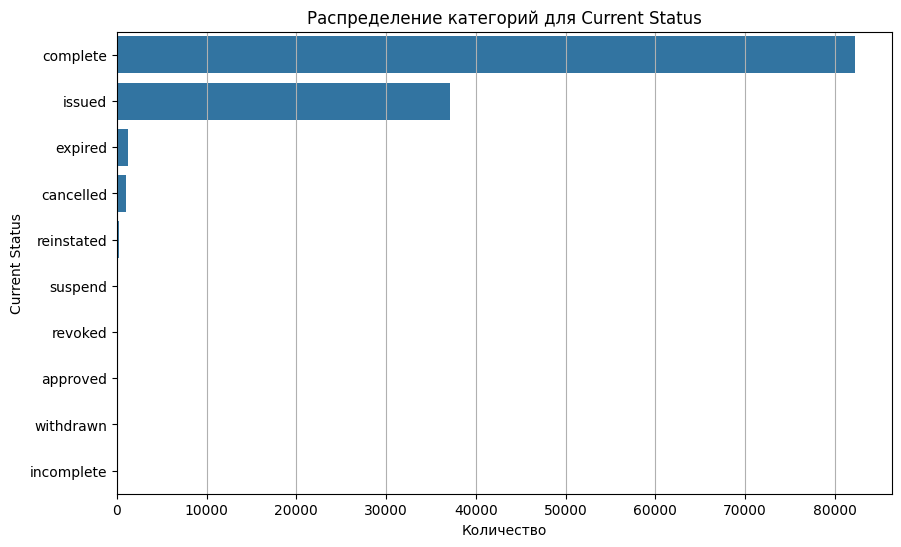

Столбец 'Existing Use' содержит 93 уникальных значений
Столбец 'Proposed Use' содержит 93 уникальных значений
Столбец 'Neighborhoods - Analysis Boundaries' содержит 41 уникальных значений


In [ ]:
categorical_columns = Pmtsdata.select_dtypes(include='object').columns


for column in categorical_columns:
    unique_values_count = Pmtsdata[column].nunique()
    print(f"Столбец '{column}' содержит {unique_values_count} уникальных значений")
    if unique_values_count <= 10:

        plt.figure(figsize=(10, 6))
        sns.countplot(data=Pmtsdata, y=column, order=Pmtsdata[column].value_counts().index)
        plt.title(f'Распределение категорий для {column}')
        plt.xlabel('Количество')
        plt.ylabel(column)
        plt.grid(axis='x')
        plt.show() 
        


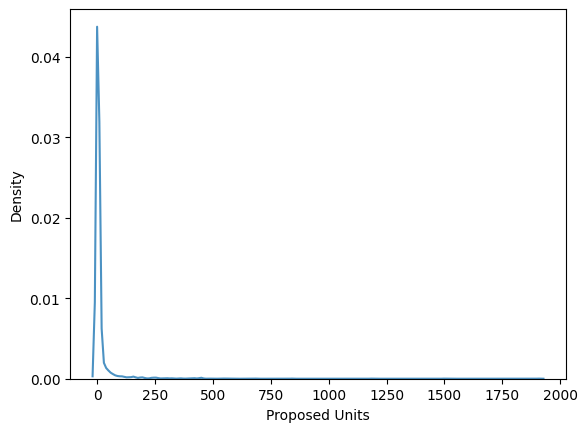

In [1003]:
sns.kdeplot(data=Pmtsdata['Proposed Units'],shade=False,alpha=0.8)
plt.show()

In [1004]:
Pmtsdata['Block'] = Pmtsdata['Block'].astype(str).str.extract(r'(\d+)')[0]
Pmtsdata['Block'] = pd.to_numeric(Pmtsdata['Block'], errors='coerce')
Pmtsdata['Block'].head()

Permit Number
201505065519     326
201604195146     306
201611072166     156
201706149344    4105
201706300814    1739
Name: Block, dtype: int64

In [1005]:
categorical_columns = Pmtsdata.select_dtypes(include='object').columns
num_cols = Pmtsdata.select_dtypes(include=['float64', 'int64'])
Pmtsdata[categorical_columns] = Pmtsdata[categorical_columns].fillna("NULLVALUE")
for col in num_cols:
    Pmtsdata[col] = Pmtsdata[col].fillna(Pmtsdata[col].median())

### Подготовка данных для обучения

In [ ]:
import numpy as np

def mae(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred))

def mse(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

def rmse(y_true, y_pred):
    return np.sqrt(mse(y_true, y_pred))


In [ ]:
y=pd.DataFrame(Pmtsdata['Time_in_Days'])
X = Pmtsdata.drop(['Time_in_Days'],axis=1)

In [1008]:
categorical_cols = [cname for cname in X.columns 
                    if X[cname].nunique() <= 21 and X[cname].dtype == "object"]
categorical_cols

['Permit Type Definition', 'Current Status']

In [1009]:
categorical_colsOH= pd.get_dummies(X[categorical_cols])
categorical_colsOH.shape

(122094, 18)

In [1010]:
numerical_cols = [cname for cname in X.columns 
                  if X[cname].dtype in ['int64', 'float64']]
scaler = StandardScaler()
X[numerical_cols] = scaler.fit_transform(X[numerical_cols] )

In [ ]:
numerical_data = pd.DataFrame(X[numerical_cols])
numerical_data.head()


,Permit Type,Block,Street Number,Issued Date,Completed Date,Number of Proposed Stories,Revised Cost,Proposed Units,Plansets,Proposed Construction Type,Supervisor District,Zipcode
Permit Number,,,,,,,,,,,,
201505065519,-3.644860,-1.114469,-0.847912,0.171525,0.068215,-0.280924,-0.666524,-0.184067,0.035723,0.522792,-0.918730,-1.493679
201604195146,-3.644860,-1.123675,-0.583933,1.348208,0.068215,-0.280924,-0.887643,-0.184067,0.035723,0.522792,-0.918730,-1.493679
201611072166,0.237814,-1.192721,0.111211,1.318466,1.521275,-0.407946,-0.792878,-0.198639,0.035723,0.522792,-0.918730,-0.734830
201706149344,0.237814,0.625022,-0.267158,1.296159,0.068215,-0.026881,-0.666524,4.537518,0.035723,-2.161161,1.505220,-0.951644
201706300814,0.237814,-0.464059,0.164887,1.285005,1.492783,-0.280924,-0.161107,-0.140348,-0.041876,0.522792,-0.226173,0.674462


In [ ]:

features =pd.concat([categorical_colsOH, numerical_data],axis=1) 

features.shape

(122094, 30)

In [1013]:
y = np.array(y).reshape((-1, ))

In [1014]:
X_train, X_test, y_train, y_test =train_test_split(features,y,test_size=0.2,random_state=0)

In [1015]:
X_train.shape

(97675, 30)

In [1016]:
X_test.shape

(24419, 30)

In [ ]:
from sklearn.metrics import mean_absolute_error
import numpy as np

def fit_and_evaluate(model):
    
    model.fit(X_train, y_train)
    
    model_pred = model.predict(X_test)
    model_mae = mae(y_test, model_pred)
    model_mse = mse(y_test, model_pred)
    model_rmse = np.sqrt(model_mse)
    

    print(f"MAE: {model_mae:.4f}")
    print(f"MSE: {model_mse:.4f}")
    print(f"RMSE: {model_rmse:.4f}")
    
    return model_mae, model_mse, model_rmse, model_r2

### Кластеризация

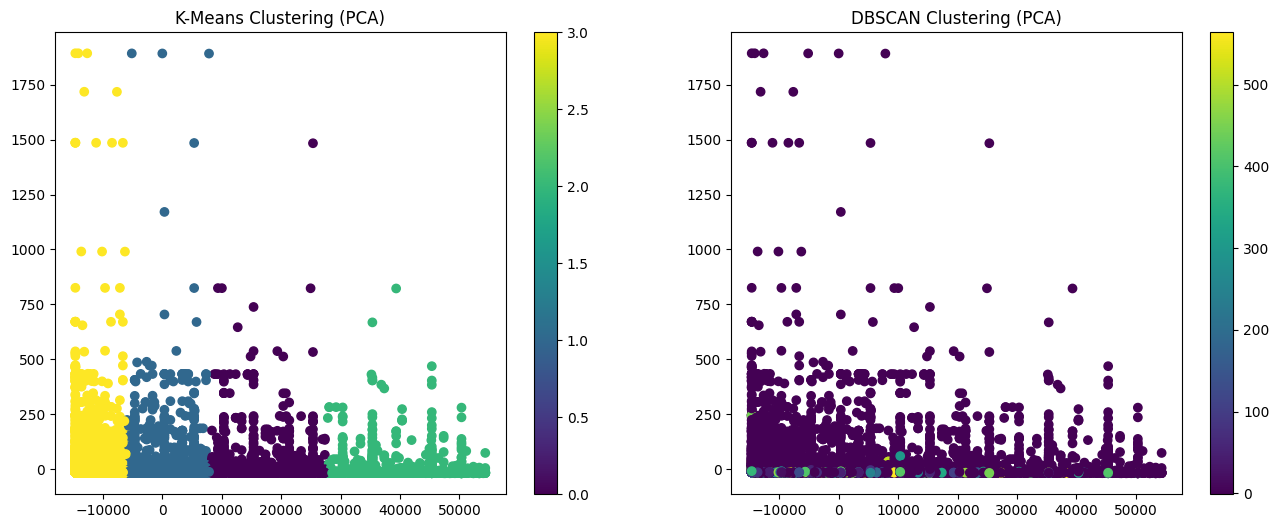

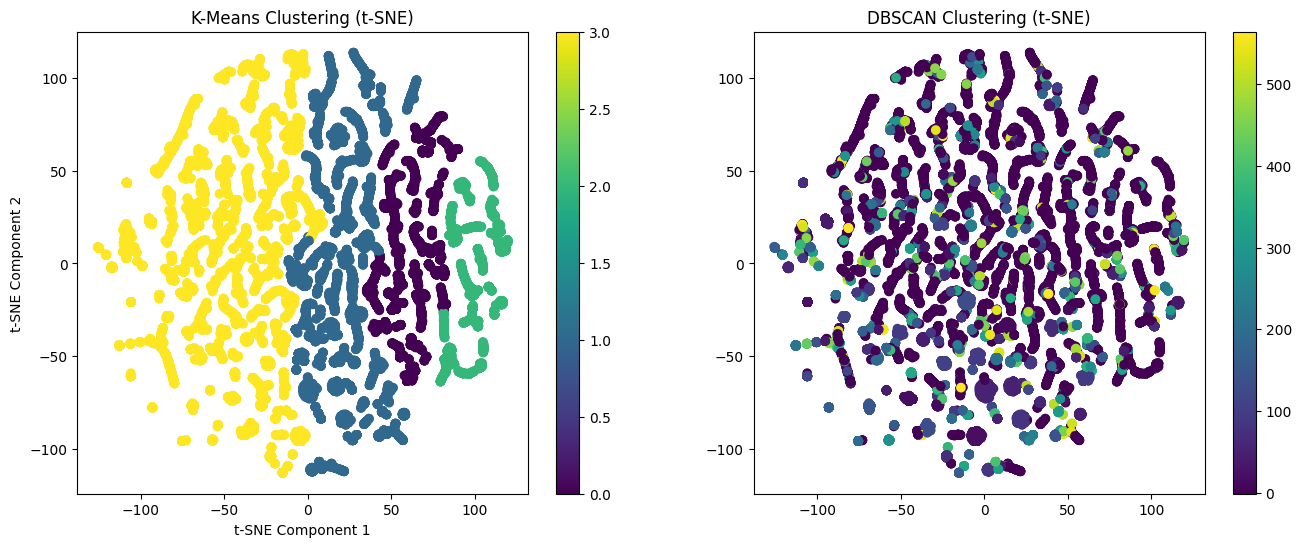

In [ ]:
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

X = Pmtsdata[['Proposed Units', 'Number of Proposed Stories', 'Revised Cost']].sample(20000) # 3 выбранных признака


kmeans = KMeans(n_clusters=4) 
kmeans_labels = kmeans.fit_predict(X)


dbscan = DBSCAN(eps=0.49, min_samples=5)
dbscan_labels = dbscan.fit_predict(X)


pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(16, 6))

plt.subplot(1, 2, 1)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_labels)
plt.title('K-Means Clustering (PCA)')
plt.colorbar()

plt.subplot(1, 2, 2)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=dbscan_labels)
plt.title('DBSCAN Clustering (PCA)')
plt.colorbar()

plt.show()


tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X)

plt.figure(figsize=(16, 6))

plt.subplot(1, 2, 1)
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=kmeans_labels)
plt.title('K-Means Clustering (t-SNE)')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.colorbar()

plt.subplot(1, 2, 2)
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=dbscan_labels)
plt.title('DBSCAN Clustering (t-SNE)')
plt.colorbar()

plt.show()

In [ ]:
from sklearn.metrics import silhouette_score

kmeans_silhouette = silhouette_score(X, kmeans_labels)
print(f"(K-Means): {kmeans_silhouette:.3f}")

if len(set(dbscan_labels)) > 1: 
    dbscan_silhouette = silhouette_score(X, dbscan_labels)
    print(f"(DBSCAN): {dbscan_silhouette:.3f}")

Silhouette Score (K-Means): 0.605
Silhouette Score (DBSCAN): 0.068


Из данных не удалось выделить четкие кластеры. Данные о затратах (Revised Cost) не позволяют сказать ничего ясного ни о числе этажей (Number of Proposed Stories), ни о количестве зданий (Proposed Units)

### Обучение

##### Метрики:
+ MAE - позволяет посмотреть, насколько сильна ошибка предсказания (в тех же единицах). Менее чувсительна к выбросам, чем MSE (RMSE)
+ MSE - вычисляет среднее значение квадратов ошибок (стандартное отклонение)
+ RMSE - Корень из MSE. Облегчает интерпретируемость (в тех же единицах)

In [ ]:
baseline_guess = np.median(y)

print('The baseline guess of number of days taken: %0.2f days' % baseline_guess)
print("Baseline Performance on the test set: MAE = %0.4f" % mae(y_test, baseline_guess))
print("Baseline Performance on the test set: MSE = %0.4f" % mse(y_test, baseline_guess))
print("Baseline Performance on the test set: MSE = %0.4f" % rmse(y_test, baseline_guess))

The baseline guess of number of days taken: 0.00 days
Baseline Performance on the test set: MAE = 17.2254
Baseline Performance on the test set: MSE = 4772.2826
Baseline Performance on the test set: MSE = 69.0817
Baseline Performance on the test set: R2 = -0.0663


In [1021]:
print('Linear Regression')
lr = LinearRegression()
fit_and_evaluate(lr)


Linear Regression
MAE: 20.7436
MSE: 2869.0537
RMSE: 53.5635
R^2 Score: 0.3590


(np.float64(20.743587274415777),
 np.float64(2869.053707298888),
 np.float64(53.56354830758403),
 np.float64(0.35895229204146517))

In [1022]:
print('Random Forest')
random_forest = RandomForestRegressor(random_state=0)
fit_and_evaluate(random_forest)

Random Forest
MAE: 15.2139
MSE: 1904.4627
RMSE: 43.6402
R^2 Score: 0.5745


(np.float64(15.213878919922962),
 np.float64(1904.4627317779632),
 np.float64(43.64015045549182),
 np.float64(0.5744759096029257))

In [1023]:
print('Ridge Regression')
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

ridge_model = Ridge(alpha=1.0) 
fit_and_evaluate(ridge_model)

Ridge Regression
MAE: 20.7420
MSE: 2865.2395
RMSE: 53.5279
R^2 Score: 0.3598


(np.float64(20.742001290718687),
 np.float64(2865.23950768131),
 np.float64(53.52793203255016),
 np.float64(0.3598045186541371))

In [1024]:
from sklearn.tree import DecisionTreeRegressor

print('Desicion tree')
dt_model = DecisionTreeRegressor(random_state=0)
fit_and_evaluate(dt_model)


Desicion tree
MAE: 17.7808
MSE: 4302.4442
RMSE: 65.5930
R^2 Score: 0.0387


(np.float64(17.780834205994942),
 np.float64(4302.444158664599),
 np.float64(65.59301913057973),
 np.float64(0.03868235038090173))

Случайный лес справился гораздо лучше, чем остальные модели по всем параметрам. 

С некоторым отставанием идет дерево решений (MAE и MSE почти равны предсказанию по медиане, модель ничего не объясняет)

Хуже всего дела обстоят с линейными моделями - линейной регрессией и гребневой, они предсказывают хуже, чем модель по медиане

### Обучение модели градиентного бустинга

In [1030]:
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder

print('XGBoost')
label_encoder = LabelEncoder()
xgb_model = xgb.XGBClassifier(n_estimators=40, learning_rate=0.1, random_state=61)
xgb_model.fit(X_train, label_encoder.fit_transform(y_train))   
y_pred = xgb_model.predict(X_test)

XGBoost


In [ ]:
model_pred = label_encoder.inverse_transform(y_pred)
model_mae = mae(y_test, model_pred)
model_mse = mse(y_test, model_pred)
model_rmse = np.sqrt(model_mse)


print(f"MAE: {model_mae:.4f}")
print(f"MSE: {model_mse:.4f}")
print(f"RMSE: {model_rmse:.4f}")

MAE: 15.5069
MSE: 3856.3646
RMSE: 62.0996


Почти одинаково с Random Forest по MAE, однако когда дело касается больших значений, предсказывает хуже (MSE сильно выше)

In [ ]:
import optuna

def objective(trial):

    param = {
        'verbosity': 0,
        'objective': 'reg:absoluteerror',
        'booster': 'gbtree',
        'n_estimators': trial.suggest_int('n_estimators', 10, 1000),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 1),
        'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.5, 1.0),
        'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
        'lambda': trial.suggest_loguniform('lambda', 1e-3, 10.0),
        'alpha': trial.suggest_loguniform('alpha', 1e-3, 10.0),
    }

    model = xgb.XGBRegressor(**param)
    model.fit(X_train, y_train)
    

    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    

    print(f'Trial {trial.number} - MAE: {mae} with params: {param}')
    
    return 1 / mae

study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=40, timeout=95)

best_params = study.best_params
best_acc = study.best_value

print('Best hyperparameters: ', study.best_params)

best_params = study.best_params
best_model = xgb.XGBRegressor(**best_params)
best_model.fit(X_train, y_train)

y_pred_final = best_model.predict(X_test)

model_mae = mae(y_test, y_pred_final)
model_mse = mse(y_test, y_pred_final)
model_rmse = np.sqrt(model_mse)

print(f"MAE: {model_mae:.4f}")
print(f"MSE: {model_mse:.4f}")
print(f"RMSE: {model_rmse:.4f}")

[I 2025-09-30 16:40:54,088] A new study created in memory with name: no-name-e7346f58-f9f5-4675-aa61-409b58736087
[I 2025-09-30 16:40:55,568] Trial 0 finished with value: 0.07275292157956133 and parameters: {'n_estimators': 35, 'max_depth': 10, 'learning_rate': 0.054144300888548866, 'colsample_bytree': 0.5945085267815492, 'subsample': 0.9350571032090547, 'lambda': 3.961897640741682, 'alpha': 0.0020552879326730094}. Best is trial 0 with value: 0.07275292157956133.


Trial 0 - MAE: 13.745152473449707 with params: {'verbosity': 0, 'objective': 'reg:absoluteerror', 'booster': 'gbtree', 'n_estimators': 35, 'max_depth': 10, 'learning_rate': 0.054144300888548866, 'colsample_bytree': 0.5945085267815492, 'subsample': 0.9350571032090547, 'lambda': 3.961897640741682, 'alpha': 0.0020552879326730094}


[I 2025-09-30 16:41:14,225] Trial 1 finished with value: 0.07518930592286015 and parameters: {'n_estimators': 628, 'max_depth': 8, 'learning_rate': 0.23513883049005754, 'colsample_bytree': 0.662204656716525, 'subsample': 0.9014378838586075, 'lambda': 0.13676567776935147, 'alpha': 0.18165475571837303}. Best is trial 1 with value: 0.07518930592286015.


Trial 1 - MAE: 13.299763679504395 with params: {'verbosity': 0, 'objective': 'reg:absoluteerror', 'booster': 'gbtree', 'n_estimators': 628, 'max_depth': 8, 'learning_rate': 0.23513883049005754, 'colsample_bytree': 0.662204656716525, 'subsample': 0.9014378838586075, 'lambda': 0.13676567776935147, 'alpha': 0.18165475571837303}


[I 2025-09-30 16:41:36,125] Trial 2 finished with value: 0.0630542402752273 and parameters: {'n_estimators': 986, 'max_depth': 10, 'learning_rate': 0.2632310317493107, 'colsample_bytree': 0.7650271637631865, 'subsample': 0.5094661645654621, 'lambda': 0.10858289572515732, 'alpha': 0.013822633865044981}. Best is trial 1 with value: 0.07518930592286015.


Trial 2 - MAE: 15.85936164855957 with params: {'verbosity': 0, 'objective': 'reg:absoluteerror', 'booster': 'gbtree', 'n_estimators': 986, 'max_depth': 10, 'learning_rate': 0.2632310317493107, 'colsample_bytree': 0.7650271637631865, 'subsample': 0.5094661645654621, 'lambda': 0.10858289572515732, 'alpha': 0.013822633865044981}


[I 2025-09-30 16:41:36,632] Trial 3 finished with value: 0.06936423832473129 and parameters: {'n_estimators': 12, 'max_depth': 3, 'learning_rate': 0.7243434373579719, 'colsample_bytree': 0.6019540567136821, 'subsample': 0.6893991861161817, 'lambda': 0.023688769756650883, 'alpha': 7.972563388847661}. Best is trial 1 with value: 0.07518930592286015.


Trial 3 - MAE: 14.416650772094727 with params: {'verbosity': 0, 'objective': 'reg:absoluteerror', 'booster': 'gbtree', 'n_estimators': 12, 'max_depth': 3, 'learning_rate': 0.7243434373579719, 'colsample_bytree': 0.6019540567136821, 'subsample': 0.6893991861161817, 'lambda': 0.023688769756650883, 'alpha': 7.972563388847661}


[I 2025-09-30 16:41:38,831] Trial 4 finished with value: 0.07336671877646757 and parameters: {'n_estimators': 89, 'max_depth': 9, 'learning_rate': 0.022707628329612404, 'colsample_bytree': 0.7180421824614771, 'subsample': 0.6990042036443855, 'lambda': 0.0627239496339035, 'alpha': 0.10135298322616858}. Best is trial 1 with value: 0.07518930592286015.


Trial 4 - MAE: 13.630158424377441 with params: {'verbosity': 0, 'objective': 'reg:absoluteerror', 'booster': 'gbtree', 'n_estimators': 89, 'max_depth': 9, 'learning_rate': 0.022707628329612404, 'colsample_bytree': 0.7180421824614771, 'subsample': 0.6990042036443855, 'lambda': 0.0627239496339035, 'alpha': 0.10135298322616858}


[I 2025-09-30 16:41:56,899] Trial 5 finished with value: 0.07641851192275592 and parameters: {'n_estimators': 717, 'max_depth': 9, 'learning_rate': 0.20107196861583454, 'colsample_bytree': 0.6913845784368517, 'subsample': 0.955788916503179, 'lambda': 0.006276229038203877, 'alpha': 8.979592689514059}. Best is trial 5 with value: 0.07641851192275592.


Trial 5 - MAE: 13.085834503173828 with params: {'verbosity': 0, 'objective': 'reg:absoluteerror', 'booster': 'gbtree', 'n_estimators': 717, 'max_depth': 9, 'learning_rate': 0.20107196861583454, 'colsample_bytree': 0.6913845784368517, 'subsample': 0.955788916503179, 'lambda': 0.006276229038203877, 'alpha': 8.979592689514059}


[I 2025-09-30 16:42:10,997] Trial 6 finished with value: 0.07425175447329971 and parameters: {'n_estimators': 597, 'max_depth': 7, 'learning_rate': 0.38967245598004135, 'colsample_bytree': 0.6310543282495522, 'subsample': 0.9126670616004635, 'lambda': 0.002004607417029506, 'alpha': 0.07488329716891481}. Best is trial 5 with value: 0.07641851192275592.


Trial 6 - MAE: 13.467695236206055 with params: {'verbosity': 0, 'objective': 'reg:absoluteerror', 'booster': 'gbtree', 'n_estimators': 597, 'max_depth': 7, 'learning_rate': 0.38967245598004135, 'colsample_bytree': 0.6310543282495522, 'subsample': 0.9126670616004635, 'lambda': 0.002004607417029506, 'alpha': 0.07488329716891481}


[I 2025-09-30 16:42:18,992] Trial 7 finished with value: 0.07207468279299568 and parameters: {'n_estimators': 506, 'max_depth': 5, 'learning_rate': 0.012233854336199232, 'colsample_bytree': 0.5348646927640606, 'subsample': 0.535023568626528, 'lambda': 0.7537288462905399, 'alpha': 3.0130388716705516}. Best is trial 5 with value: 0.07641851192275592.


Trial 7 - MAE: 13.874497413635254 with params: {'verbosity': 0, 'objective': 'reg:absoluteerror', 'booster': 'gbtree', 'n_estimators': 506, 'max_depth': 5, 'learning_rate': 0.012233854336199232, 'colsample_bytree': 0.5348646927640606, 'subsample': 0.535023568626528, 'lambda': 0.7537288462905399, 'alpha': 3.0130388716705516}


[I 2025-09-30 16:42:34,383] Trial 8 finished with value: 0.07271274825252413 and parameters: {'n_estimators': 747, 'max_depth': 7, 'learning_rate': 0.43070064253188545, 'colsample_bytree': 0.7218823564886041, 'subsample': 0.8471299820155155, 'lambda': 0.007290871017617079, 'alpha': 0.0604127936019492}. Best is trial 5 with value: 0.07641851192275592.


Trial 8 - MAE: 13.75274658203125 with params: {'verbosity': 0, 'objective': 'reg:absoluteerror', 'booster': 'gbtree', 'n_estimators': 747, 'max_depth': 7, 'learning_rate': 0.43070064253188545, 'colsample_bytree': 0.7218823564886041, 'subsample': 0.8471299820155155, 'lambda': 0.007290871017617079, 'alpha': 0.0604127936019492}
Best hyperparameters:  {'n_estimators': 717, 'max_depth': 9, 'learning_rate': 0.20107196861583454, 'colsample_bytree': 0.6913845784368517, 'subsample': 0.955788916503179, 'lambda': 0.006276229038203877, 'alpha': 8.979592689514059}
MAE: 16.7341
MSE: 2041.5177
RMSE: 45.1832


Модель сравнялась с результатами Random Forest по MSE, однако просела по MAE.

### Оценка важности признаков


Лучшая модель - Random Forest 

100%|===================| 24403/24419 [22:07<00:00]        

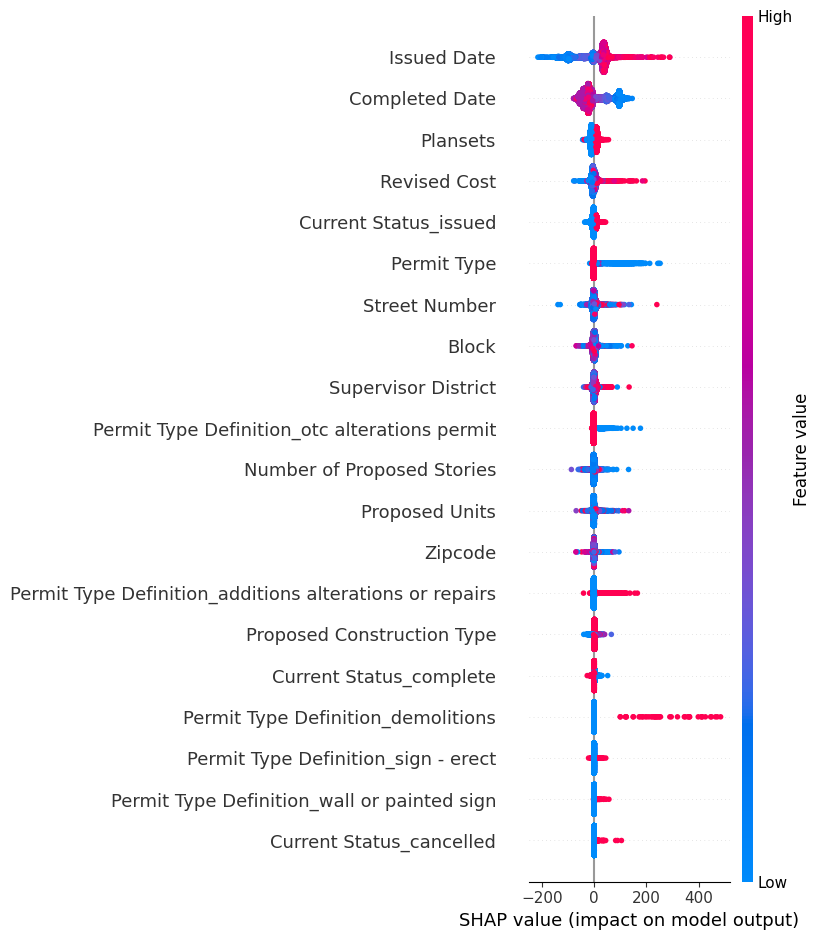

In [ ]:
import shap

explainer = shap.Explainer(best_model, X_train.to_numpy(dtype=np.float64))
shap_values = explainer(X_test)


shap.summary_plot(shap_values, X_test)


In [ ]:
from lime.lime_tabular import LimeTabularExplainer

lime_explainer = LimeTabularExplainer(X_train.values, feature_names=X_train.columns, class_names=['target'], mode='regression')
exp = lime_explainer.explain_instance(X_test.iloc[0].values, best_model.predict, num_features=X_train.shape[1])

dict_exp = dict(exp.as_list())


data = {
    'Feature': [],
    'Negative': [],
    'Positive': []
}

for feature, weight in dict_exp.items():
    if weight < 0:
        data['Feature'].append(feature)
        data['Negative'].append(weight)
        data['Positive'].append(0)
    else:
        data['Feature'].append(feature)
        data['Negative'].append(0)
        data['Positive'].append(weight)


df = pd.DataFrame(data)
df['Total Impact'] = df['Negative'] + df['Positive']
df = df.reindex(df['Total Impact'].abs().sort_values(ascending=False).index)


print(df[['Feature', 'Negative', 'Positive']])


                                              Feature    Negative   Positive
0          Permit Type Definition_demolitions <= 0.00 -125.679258   0.000000
1                      Current Status_suspend <= 0.00  -92.878882   0.000000
2                      -0.54 < Completed Date <= 0.07  -80.047865   0.000000
3                                Issued Date <= -0.85  -78.620124   0.000000
4   Permit Type Definition_additions alterations o...  -69.874160   0.000000
5                    Current Status_cancelled <= 0.00  -60.799102   0.000000
6   Permit Type Definition_wall or painted sign <=...    0.000000  54.076085
7                0.00 < Current Status_issued <= 1.00    0.000000  39.362036
8                             -0.08 < Zipcode <= 0.67  -26.304519   0.000000
9                                 Revised Cost > 0.34    0.000000  22.331902
10  Permit Type Definition_grade or quarry or fill...    0.000000  21.237609
11                               Street Number > 0.49    0.000000  17.345875

In [ ]:
perm_importance = permutation_importance(best_model, X_test, y_test, n_repeats=30, random_state=0)

sorted_idx = perm_importance.importances_mean.argsort()
feature_names = X_train.columns.tolist()

print("Permutation Importance:")
for i in sorted_idx:
    print(f"{feature_names[i]}: {perm_importance.importances_mean[i]:.3f}")

Permutation Importance:
Permit Type Definition_new construction wood frame: -0.006
Current Status_expired: -0.000
Current Status_revoked: -0.000
Current Status_incomplete: 0.000
Current Status_withdrawn: 0.000
Permit Type Definition_new construction: 0.000
Current Status_approved: 0.000
Permit Type Definition_grade or quarry or fill or excavate: 0.000
Current Status_suspend: 0.000
Current Status_reinstated: 0.000
Permit Type Definition_wall or painted sign: 0.002
Current Status_cancelled: 0.003
Permit Type Definition_sign - erect: 0.006
Proposed Construction Type: 0.025
Current Status_complete: 0.026
Permit Type Definition_otc alterations permit: 0.042
Proposed Units: 0.058
Zipcode: 0.060
Plansets: 0.063
Current Status_issued: 0.067
Supervisor District: 0.067
Number of Proposed Stories: 0.099
Permit Type Definition_additions alterations or repairs: 0.102
Block: 0.110
Permit Type Definition_demolitions: 0.118
Revised Cost: 0.118
Street Number: 0.128
Permit Type: 0.228
Issued Date: 2.980

In [ ]:

shap_importance = np.abs(shap_values.values).mean(axis=0)
feature_importance = pd.DataFrame(list(zip(X_train.columns, shap_importance)), columns=['Feature', 'Importance'])
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)


selected_features = feature_importance['Feature'].iloc[:int(0.5 * len(feature_importance))]

X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

best_model.fit(X_train_selected, y_train)
y_pred = best_model.predict(X_test_selected)

In [1072]:
model_mae = mae(y_test, y_pred)
model_mse = mse(y_test, y_pred)
model_rmse = np.sqrt(model_mse)

print(f"MAE: {model_mae:.4f}")
print(f"MSE: {model_mse:.4f}")
print(f"RMSE: {model_rmse:.4f}")

MAE: 16.7277
MSE: 2006.9248
RMSE: 44.7987


После отбора 50% важных признаков по SHAP результат модели остался примерно таким же по MSE, однако просел по MAE, улучшений не наблюдается

##### Было
+ MAE: 15.2139
+ MSE: 1904.4627
+ RMSE: 43.6402

##### Стало
+ MAE: 16.7277
+ MSE: 2006.9248
+ RMSE: 44.7987

Идеи по улучшению

Можно заметить, как сильно влияют даты-признаки на итоговый результат. Некоторые признаки, содержащие даты, были отброшены вследствие сильной корреляции (по матрице корреляций). Однако эти даты, даже если и отличались на несколько дней, могли нести в себе важную информацию. Можно попробовать исследовать качество моделей на основе добавления в датасет разниц между датами или увеличения важности этих признаков.

Признаки "Description" могли содержать важную текстовую информацию, однако она была опущена.

Параметр "Location" был исключен по соображениям другого признака - Supervisor District, допускающего гораздо меньшее число значений. Возможно, учитывая точную широту и долготу объекта, предсказания были бы лучше

Проблема признака Completed Date - он является очень важным для модели, однако примерно в половине данных он не заполнен. Можно было бы придумать более сбалансированное заполнение его пропуска (не просто медианой/средним), исследуя его зависимость от Time_in_Days

### Выводы

Случайный лес оказался лучшей моделью среди решающего дерева, линейной регрессии, гребневой регрессии и бустинга.
Модели удается предсказывать таргет с ошибками: MAE 15.21, RMSE 43.21 (против медианного предсказывания: MAE 17.2254, MSE 69.0817)

Реальные данные имеют очень много пропусков и сильно зашумлены, что значительно усложняет процесс моделирования. Более 50% данных можно было потерять при удалении записей с пропусками, что указывает на необходимость более сложных стратегий обработки пропущенных значений.

**Важность признаков**: Наиболее значимыми оказались временные признаки (Issued Date, Completed Date), что логично для задачи предсказания времени обработки заявки. Стоимость проекта (Revised Cost) и тип разрешения также играют важную роль.

**Проблемы данных**: Высокий уровень зашумленности, Сильная корреляция между признаками потребовала удаления столбцов, потенциально имеющих важную информацию, категориальные признаки с большим количеством уникальных значений затрудняют интерпретацию

**Ограничения кластеризации**: Попытки выделить кластеры в данных не дали четких результатов (Silhouette Score для K-Means: 0.605, для DBSCAN: 0.068)

Модель демонстрирует приемлемое качество предсказаний для практического применения, но требует дальнейшего совершенствования для повышения точности.

